In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context("talk")

In [3]:
data = pd.read_csv(
    "../Datasets/example_air_passengers.csv",
    parse_dates=["ds"],
    index_col=["ds"],
)

data.head()

,y
ds,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


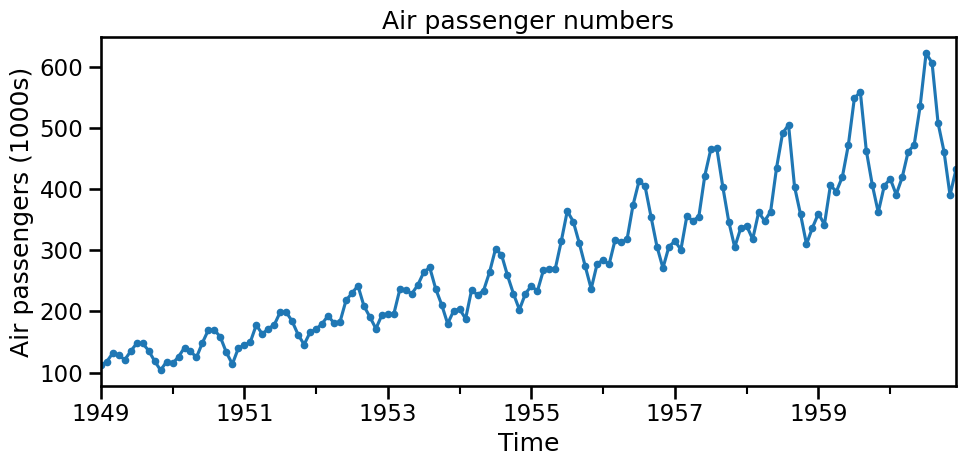

In [4]:
fig, ax = plt.subplots(figsize=[10, 5])
data.plot(y="y", marker=".", figsize=[10, 5], legend=None, ax=ax)
ax.set_xlabel("Time")
ax.set_ylabel("Air passengers (1000s)")
ax.set_title("Air passenger numbers")
plt.tight_layout()

# Box-Cox Transformation

<img src='../images/Screenshot 2024-05-12 010327.jpg'>

* We can let scipy automatically find a good value for lmbda by setting the lmbda argument in boxcox to None. This happens by default by omitting the lmbda argument. Scipy uses the maximum likelihood method to automatically select a good value for lmbda. In practice, the Guerrero method (shown later in this notebook) may be a better option as it does not make assumptions about the underlying distribution and tries to specifically stabilise the variance across the time series.

In [5]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

In [11]:
df = data.copy()  # Make a copy of data so we can re-use data later
df["y_boxcox"], lmbda = boxcox(df["y"], lmbda=None)  # Equivalent to a log transform

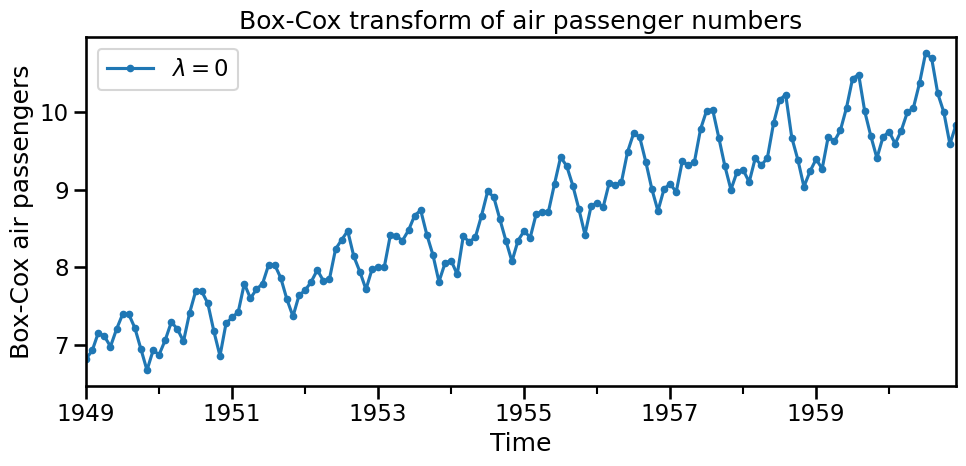

In [12]:
# Plot the Box-Cox transformed time series
fig, ax = plt.subplots(figsize=[10, 5])
df.plot(y="y_boxcox", marker=".", figsize=[10, 5], label="$\lambda=0$", ax=ax)
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Box-Cox air passengers")
ax.set_title("Box-Cox transform of air passenger numbers")
plt.tight_layout()

# Log Transformations 

In [13]:
from sktime.transformations.series.boxcox import LogTransformer

df = data.copy()
transformer = LogTransformer()
df["y_log"] = transformer.fit_transform(df["y"])

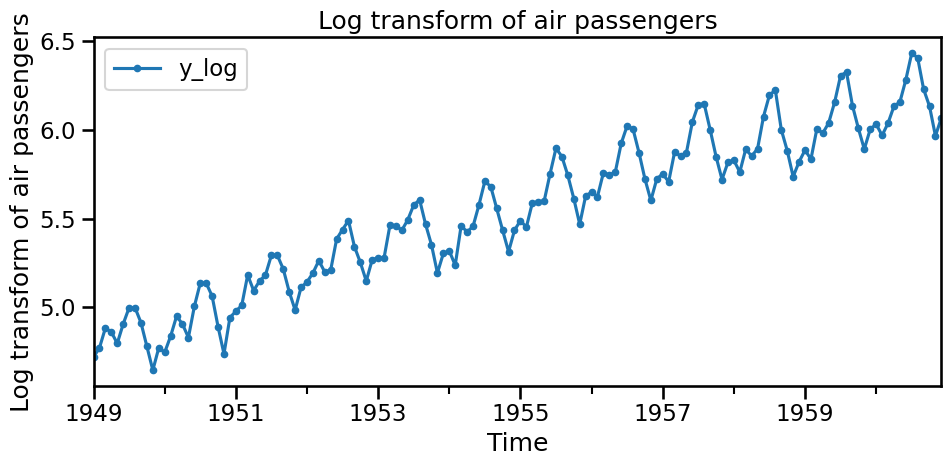

In [14]:
fig, ax = plt.subplots(figsize=[10, 5])
df.plot(
    y="y_log",
    marker=".",
    figsize=[10, 5],
    ax=ax,
)
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Log transform of air passengers")
ax.set_title("Log transform of air passengers")
plt.tight_layout()